# Project: Airbnb analysis - Prague

### Introduction

This case study explores the current Airbnb listings in Prague, providing a comprehensive breakdown of data by city district. We analyze spatial distribution, price trends, and accommodation types to uncover key patterns in the short-term rental market.
<br>To enrich our findings, we incorporate insights from the real estate sector, examining apartment selling prices across different districts.

#### About the Dataset

The dataset originates from Inside Airbnb website and includes the latest available data from March 2025. To provide a broader perspective, we also incorporate quarterly data from the past year for comparative analysis.
<br>However, the dataset comes with several limitations:
<br>- not all Airbnb listings are included (only those currently available),
<br>- key details such as the maximum number of guests per listing and room size are missing,
<br>- occupancy data may be affected by blocked dates, not just actual bookings.
<br>Despite these constraints, the dataset remains highly valuable for this case study, offering meaningful insights into the Prague Airbnb market.

#### Our Goal

The goal of this Airbnb analysis is to gain a deeper understanding of the short-term rental market in Prague, helping hosts, investors, and travelers make better decisions.
<br>Specifically, the study aims to identify and assess market trends by analyzing pricing patterns, neighborhood distribution, and accommodation types. We also compare Airbnb profitability with real estate selling prices to gauge the financial viability of short-term rentals in different districts.
<br>
<br>By using Python and a data-driven approach, this study will provide valuable insights into the evolving Airbnb landscape in Prague.

### 1. Data Exploration

In [3]:
import pandas as pd
# data manipulation, analysis

##### Importing the dataset

In [7]:
df = pd.read_csv(r"listings-short-03-2025.csv")

##### Making a copy of the dataframe

In [9]:
df_1 = df.copy()

##### Basic information about the dataframe

In [12]:
df_1.shape

(10108, 18)

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10108 non-null  int64  
 1   name                            10108 non-null  object 
 2   host_id                         10108 non-null  int64  
 3   host_name                       10107 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10108 non-null  object 
 6   latitude                        10108 non-null  float64
 7   longitude                       10108 non-null  float64
 8   room_type                       10108 non-null  object 
 9   price                           8808 non-null   float64
 10  minimum_nights                  10108 non-null  int64  
 11  number_of_reviews               10108 non-null  int64  
 12  last_review                     

In [22]:
df_1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23163,Residence Karolina - KAROL12,5282,Klara,NaN,Praha 1,50.08229,14.41552,Entire home/apt,2918.0,1,31,2024-06-15,0.18,70,0,1,NaN
1,23169,Residence Masna - Masna302,5282,Klara,NaN,Praha 1,50.08830,14.42272,Entire home/apt,NaN,1,122,2024-11-08,0.67,70,13,6,NaN
2,26755,Central Prague Old Town Top Floor,113902,Daniel+Bea,NaN,Praha 1,50.08729,14.43179,Entire home/apt,1582.0,3,411,2025-03-07,3.43,3,173,53,NaN
3,30762,Residence Rybna - Rybna23,5282,Klara,NaN,Praha 1,50.08821,14.42623,Entire home/apt,NaN,1,16,2023-10-30,0.09,70,33,0,NaN
4,42514,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",185641,Victoria,NaN,Praha 1,50.08228,14.41345,Entire home/apt,2736.0,7,333,2023-04-30,1.88,1,362,0,NaN


#### Compare the number of listings to previous quarters

In [25]:
df_listings = pd.read_excel(r"listings count per Q.xlsx")
df_listings

,month,listings
0,03_2024,8366
1,06_2024,9066
2,09_2024,9460
3,12_2024,9929
4,03_2025,10108


We can observe a steady rise of listings with every quarter. With 21% rise on year-to-year basis.

### 2. Data Cleaning

#### Columns overview
**id, name** - property unique id and name, usually coming with a catchy phrase
<br>**host_id, host_name, calculated_host_listings_count** - information about hosts, number of properties available on AirBnB by the host
<br>**neighbourhood_group, neighbourhood, latitude, longitude** - spatial data
<br>**room_type** - we have 4 different categories of room types
<br>**price** - price per one night in local currency
<br>**minimum_nights** - restrictions of minimum night per stay
<br>**number_of_reviews, last_review, reviews_per_month, number_of_reviews_ltm** - information about reviews from guests *(ltm - last 12 months)*
<br>**availability_365** - availability of the listing for 365 days in the future
<br>**license** - regulation is not strictly enforced in Prague (new legislative coming up)

#### Dropping columns with Null values

In [31]:
df_1.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               10108
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              1300
minimum_nights                        0
number_of_reviews                     0
last_review                         975
reviews_per_month                   975
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10108
dtype: int64

In [33]:
df_1.drop(columns=["neighbourhood_group", "license"], inplace=True)

In [35]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10108 non-null  int64  
 1   name                            10108 non-null  object 
 2   host_id                         10108 non-null  int64  
 3   host_name                       10107 non-null  object 
 4   neighbourhood                   10108 non-null  object 
 5   latitude                        10108 non-null  float64
 6   longitude                       10108 non-null  float64
 7   room_type                       10108 non-null  object 
 8   price                           8808 non-null   float64
 9   minimum_nights                  10108 non-null  int64  
 10  number_of_reviews               10108 non-null  int64  
 11  last_review                     9133 non-null   object 
 12  reviews_per_month               

Null values in the *last_review* and *reviews_per_month* columns may suggest that the property is newly listed (in *number_of_reviews_ltm* column this value is equal to zero).

#### Dropping rows with Null price values

In [39]:
df_1["price"].isnull().sum()

1300

In [41]:
df_2 = df_1.dropna(axis=0, how="any", subset=["price"])

In [43]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 0 to 10107
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8808 non-null   int64  
 1   name                            8808 non-null   object 
 2   host_id                         8808 non-null   int64  
 3   host_name                       8807 non-null   object 
 4   neighbourhood                   8808 non-null   object 
 5   latitude                        8808 non-null   float64
 6   longitude                       8808 non-null   float64
 7   room_type                       8808 non-null   object 
 8   price                           8808 non-null   float64
 9   minimum_nights                  8808 non-null   int64  
 10  number_of_reviews               8808 non-null   int64  
 11  last_review                     8040 non-null   object 
 12  reviews_per_month               8040 n

##### Report

In [46]:
dropped = df_1.shape[0] - df_2.shape[0]
print('There were ' + str(dropped) + ' rows deleted.')
percent_dropped = dropped / df_1.shape[0] * 100
print('A total of ' + str(round(percent_dropped, 2)) + '% records were removed.')

There were 1300 rows deleted.
A total of 12.86% records were removed.


### Data Preparation for Analysis

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plotting and visualization

In [50]:
df_2.sample()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1685,20275864,Soak Up the History of an Elegant Royal Route ...,8087351,Josef,Praha 1,50.08724,14.42543,Entire home/apt,2178.0,2,358,2025-03-03,3.87,82,349,41


In [51]:
df_2.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

##### Seting the format of all the numbers column.

If we want to change scientific format of the numbers shown, we can reset the format. <br>Since we want the latitude to show up to 5 decimal places, we set all the numbers to have 5 decimal places.

In [54]:
pd.options.display.float_format = '{:.5f}'.format

##### Checking the *price* column

In [56]:
df_2.price.describe()

count     8808.00000
mean      2730.52498
std       8349.62816
min        223.00000
25%       1242.75000
50%       1762.00000
75%       2641.00000
max     251025.00000
Name: price, dtype: float64

##### Checking for the outliers

In [58]:
sorted(df_2.price)[:10]

[223.0, 241.0, 306.0, 360.0, 362.0, 366.0, 384.0, 385.0, 385.0, 391.0]

In [65]:
sorted(df_2.price, reverse=True)[:10]

[251025.0,
 251025.0,
 251025.0,
 251025.0,
 251025.0,
 251025.0,
 200820.0,
 200000.0,
 144551.0,
 144479.0]

There are some abnormally high prices in the dataset. Most of these high prices were checked on Airbnb website directlly and they have been recognised as an error in pricing.
<br>Usually we would look at the standard deviation of all the price values or calculate Interquartile Range (IQR), which is a standard practice. But in our case, because of the obvious errors and given the nature of our analysis, we will cut all the data with prices over 25.000 Kč per night. This eliminates approximatelly **0.5%** of the total listings (45 listings; mostly from the category 'entire home/apt'). 

In [68]:
df_3 = df_2.query("price < 25000")

In [70]:
len(df_2)

8808

In [72]:
len(df_3)

8763

In [74]:
len(df_2) - len(df_3)

45

In [76]:
df_2.room_type.value_counts()

room_type
Entire home/apt    7437
Private room       1205
Shared room          86
Hotel room           80
Name: count, dtype: int64

In [78]:
df_3.room_type.value_counts()

room_type
Entire home/apt    7397
Private room       1203
Shared room          86
Hotel room           77
Name: count, dtype: int64

In [80]:
df_3.price.describe()

count    8763.00000
mean     2316.43627
std      2101.35521
min       223.00000
25%      1239.00000
50%      1757.00000
75%      2625.50000
max     24643.00000
Name: price, dtype: float64

#### Visualizations

Text(0.5, 1.0, 'Prices of the listings per night [Kč]')

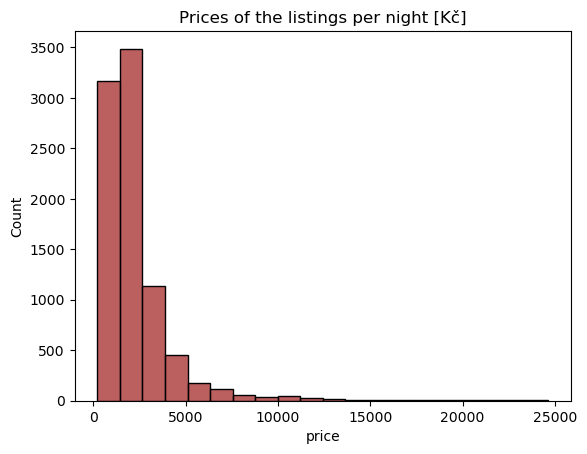

In [82]:
sns.histplot(x=df_3.price,
             bins=20,
             color="brown",
             edgecolor="black")

plt.title("Prices of the listings per night [Kč]")

##### Prices according to the room type

Text(0.5, 1.0, 'Room types offered')

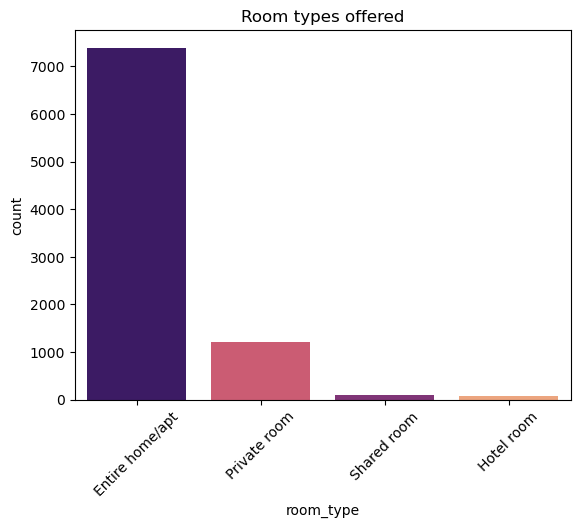

In [85]:
sns.countplot(x=df_3.room_type,
              hue=df_3.room_type,
              order=df_3.room_type.value_counts().index,
              palette="magma")

plt.xticks(rotation=45)

plt.title("Room types offered")

In [87]:
df_3.groupby("room_type").agg({"price": "mean"})

,price
room_type,
Entire home/apt,2424.44680
Hotel room,3131.87013
Private room,1726.96259
Shared room,541.95349


Text(0.5, 1.0, 'Prices by the room type')

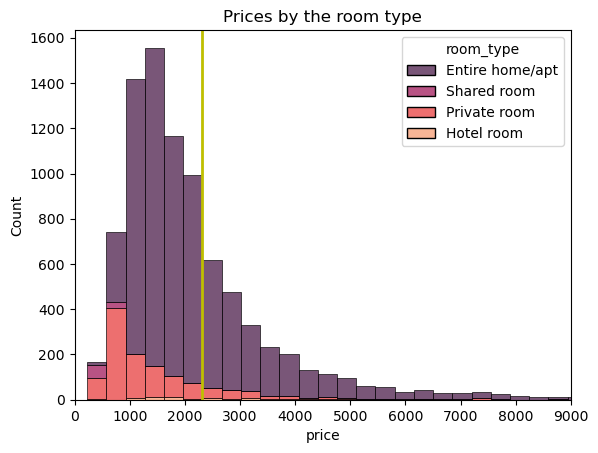

In [89]:
sns.histplot(data=df_3, x="price",
             hue="room_type",
             bins=70,
             multiple="stack",
             palette="rocket",
             legend=True);

plt.axvline(df_3.price.mean(),
            c="y",
            linewidth=2);

plt.xlim(0,9000)

plt.title("Prices by the room type")

##### Checking for the outliers in other columns, if there are any

In [92]:
df_3["availability_365"].min()

0

In [94]:
df_3["availability_365"].max()

365

There may also be errors in *minimum_nights* column, that we could handle the same way as we did the *price* column.

In [97]:
df_3.minimum_nights.describe()

count   8763.00000
mean       3.37464
std       17.89706
min        1.00000
25%        1.00000
50%        2.00000
75%        2.00000
max      730.00000
Name: minimum_nights, dtype: float64

#### Adding the *potential revenue* column
From the data for the year 2023 we can learn, that tha median occupancy rate with Airbnb was 71%. We can assume, that this value is still representative as for today.
<br>***This data was taken from on airbtics.com.*

In [102]:
df_3.loc[:,"potential_revenue"] = df_3.loc[:,"price"] * 365 * .71

In [104]:
df_3.sample()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,potential_revenue
8972,1272602562732646664,Small Luxury 2-level Apartment,412431963,Hoai Vu,Praha 1,50.08917,14.40092,Entire home/apt,1243.00000,1,4,2025-03-01,0.96000,9,130,4,322123.45000


In [106]:
len(df_3["potential_revenue"])

8763

In [108]:
round(df_3["potential_revenue"].max(), 0)

6386233.0

In [110]:
round(df_3["potential_revenue"].min(), 0)

57790.0

#### Other available data to look into

Let's dive into *availability* data.
<br>We can observe, that the listings have different occupation status for the upcoming year.

In [114]:
df_3.availability_365.describe()

count   8763.00000
mean     186.69337
std      110.02344
min        0.00000
25%       89.00000
50%      183.00000
75%      285.00000
max      365.00000
Name: availability_365, dtype: float64

Text(0.5, 1.0, 'Availability of the listings throughout the year')

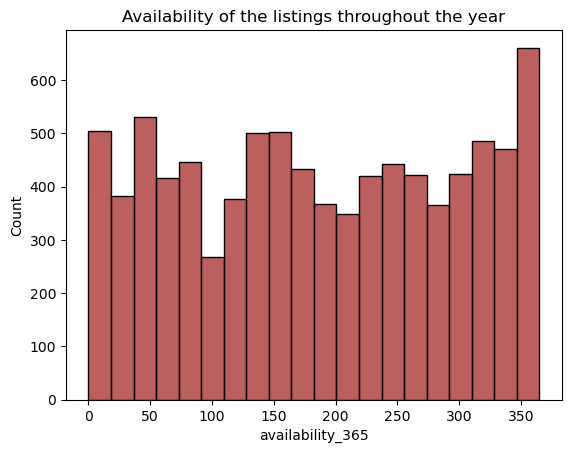

In [116]:
sns.histplot(x=df_3.availability_365,
             color="brown",
             edgecolor="black")

plt.title("Availability of the listings throughout the year")

In [120]:
df_3.loc[:,'availability_cat'] = df_3.loc[:,'availability_365'].apply(lambda x: 'low' if x <= 121.5 
                                                         else ('middle' if 121.5 < x <= 243 else 'high'))

In [122]:
df_3.sample()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,potential_revenue,availability_cat
2622,32890050,"Amazing LUXURY ""Gautama"" Apartment",239827506,Dima,Praha 1,50.07731,14.42971,Entire home/apt,7280.00000,10,60,2023-06-02,0.84000,2,365,0,1886612.00000,high


Text(0.5, 1.0, 'Availability of the listings throughout the year by category')

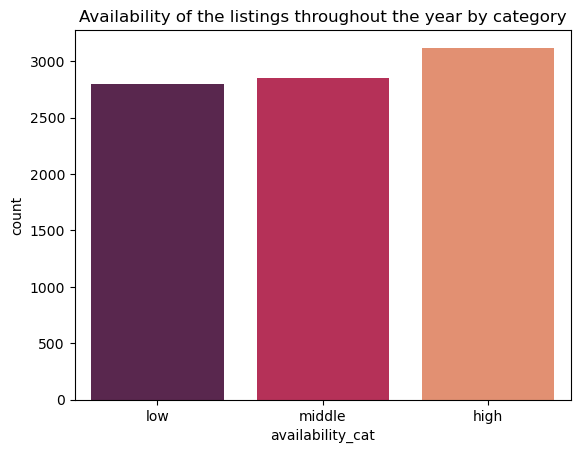

In [124]:
sns.countplot(x=df_3.availability_cat,
             hue=df_3.availability_cat,
             palette="rocket")

plt.title("Availability of the listings throughout the year by category")

#### More data to look into

We could take a peek into *reviews* data aswell.
<br>According to some statistics, total occupancy can be calculated based on monthly reviews.
<br>
<br>In the visualization below, monthly figures of reviews with the mean values are shown. (We've cut the outliers above 10.)

Text(0.5, 1.0, 'Number of reviews per month by listings')

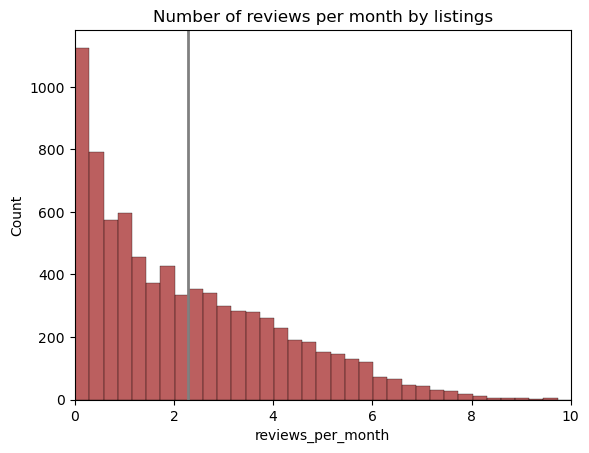

In [128]:
sns.histplot(x=df_3.reviews_per_month,
             color="brown",
             edgecolor="black")

plt.axvline(df_3.reviews_per_month.mean(),
            c="grey",
            linewidth=2);

plt.xlim(0,10)

plt.title("Number of reviews per month by listings")

#### Checking the spatial data

Understanding the distribution of Airbnb listings across Prague requires mapping them to the city's administrative structure. Prague is divided into three distinct levels of governance. To ensure accurate data representation, we must connect *neighborhood* column data (neighbourhood-level divisions) to both administrative and municipal district levels (with 22 administrative districts and 10 larger municipal districts).
<br>Additionally, for visualization purposes, municipal parts need to be linked to cadastral areas, enabling ZIP code integration for geospatial mapping.
<br>
<br>During the data merging process, we must assess the informational value of each dataset. In cases where listings are sparse, we need to determine how to handle limited data points to maintain reliability and analytical depth.

In [132]:
grouped_neighbourhood = df_3.groupby("neighbourhood").agg({"id":"count"})
grouped_neighbourhood

,id
neighbourhood,
Březiněves,3
Dolní Chabry,8
Dolní Počernice,8
Dubeč,1
Klánovice,1
Kolovraty,1
Královice,1
Kunratice,10
Libuš,18


In [134]:
sorted_neighbourhood = grouped_neighbourhood.sort_values(by='id', ascending=False)
sorted_neighbourhood

,id
neighbourhood,
Praha 1,3228
Praha 2,1567
Praha 3,987
Praha 5,780
Praha 8,497
Praha 7,364
Praha 6,308
Praha 10,278
Praha 4,270


Let's look at the top 10 neighbourhoods with the most listings.

In [137]:
sorted_neighbourhood.reset_index(inplace=True)

In [139]:
sorted_neighbourhood[:10]

,neighbourhood,id
0,Praha 1,3228
1,Praha 2,1567
2,Praha 3,987
3,Praha 5,780
4,Praha 8,497
5,Praha 7,364
6,Praha 6,308
7,Praha 10,278
8,Praha 4,270
9,Praha 9,103


### Adding New Data

#### Real Estate Price Integration and Comparison

To enhance our analysis, we gathered real estate prices from *Sreality*, the largest Czech real estate portal (<a href="www.sreality.cz/cenova-mapa/hledani/byty/hlavni-mesto-praha-10">source</a>). These prices are defined at the cadastral area level, requiring us to map them to neighborhoods in our Airbnb dataset.
<br>
To establish this connection, we utilize higher administrative units, specifically administrative districts, as an intermediary step. The administrative district data was sourced from <a href="https://en.wikipedia.org/wiki/Districts_of_Prague">Wikipedia</a>. Additionally, ZIP codes were incorporated into the dataset using information from <a href="https://postovnismerovacicisla.cz/psc/Praha">ZIP codes webpage</a> to enable geospatial visualization.
<br>This structured approach ensures accurate alignment between real estate data and Airbnb listings, facilitating more insightful market comparisons.

Uploading *ZIP codes* and *prices* datasets.

In [145]:
cadastral_area = pd.read_excel(r"Prague_ZIP_Codes - filtered.xlsx")

In [147]:
cadastral_area.sample(3)

,ZIP_Code,Cadastral_Area,Administrative_District,Municipal_District
84,18000,Libeň,Praha 8,Praha 8
108,19800,Hostavice,Praha 14,Praha 9
48,15000,Radlice,Praha 5,Praha 5


In [149]:
cadastral_area.shape

(113, 4)

In [151]:
prices_cadastral = pd.read_excel(r"prices - Prague districts.xlsx")

In [153]:
prices_cadastral.sample(3)

,Cadastral_Area,Price_PSM,Administrative_District
99,Žižkov,147461,Praha 3
16,Hloubětín,124811,Praha 9
49,Malá Strana,179970,Praha 1


In [155]:
prices_cadastral.shape

(100, 3)

In [157]:
prices_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cadastral_Area           100 non-null    object
 1   Price_PSM                100 non-null    int64 
 2   Administrative_District  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


Merging the datasets, to assign the prices per square meter:

In [160]:
cadastral_prices = cadastral_area.merge(prices_cadastral, how="left")
cadastral_prices

,ZIP_Code,Cadastral_Area,Administrative_District,Municipal_District,Price_PSM
0,10000,Vršovice,Praha 10,Praha 10,131082.00000
1,10200,Hostivař,Praha 15,Praha 10,114577.00000
2,10200,Štěrboholy,Praha 15,Praha 10,123548.00000
3,10300,Lipany,Praha 21,Praha 10,NaN
4,10300,Benice,Praha 22,Praha 10,NaN
...,...,...,...,...,...
108,19800,Hostavice,Praha 14,Praha 9,126315.00000
109,19800,Kyje,Praha 14,Praha 9,122123.00000
110,19800,Černý Most,Praha 9,Praha 9,107845.00000
111,19800,Hloubětín,Praha 9,Praha 9,124811.00000


In [162]:
cadastral_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_Code                 113 non-null    int64  
 1   Cadastral_Area           113 non-null    object 
 2   Administrative_District  113 non-null    object 
 3   Municipal_District       113 non-null    object 
 4   Price_PSM                100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.5+ KB


Calculating the average values per administrative district.

In [165]:
average_prices_neighbourhood = cadastral_prices.groupby("Administrative_District").agg({"Price_PSM":"mean"})
average_prices_neighbourhood.sample(3)

,Price_PSM
Administrative_District,
Praha 2,156165.33333
Praha 17,116584.66667
Praha 3,147461.00000


Assigning the administrative district to all the *neighbourhoods* listed in our original dataset.
<br>Merging both dataframes together and fill the missing municipality data where the districts names are based on municipalities.

In [168]:
sorted_neighbourhood.sample(3)

,neighbourhood,id
24,Slivenec,9
19,Zbraslav,10
25,Dolní Chabry,8


In [170]:
neighbourhood_expanded = sorted_neighbourhood.merge(cadastral_prices[["Cadastral_Area", "Administrative_District"]], how="left", left_on="neighbourhood", right_on="Cadastral_Area").drop("Cadastral_Area", axis=1)
neighbourhood_expanded.sample(5)

,neighbourhood,id,Administrative_District
40,Satalice,3,Praha 19
29,Praha 21,5,NaN
47,Kolovraty,1,Praha 22
37,Újezd,3,Praha 11
1,Praha 2,1567,NaN


Filling in the NaN values.

In [173]:
neighbourhood_expanded["Administrative_District"] = neighbourhood_expanded["Administrative_District"].fillna(neighbourhood_expanded["neighbourhood"])
neighbourhood_expanded.sample(5)

,neighbourhood,id,Administrative_District
47,Kolovraty,1,Praha 22
15,Libuš,18,Praha 12
25,Dolní Chabry,8,Praha 8
26,Dolní Počernice,8,Praha 9
41,Suchdol,2,Praha 6


Group listings count according to administrative districts.

In [176]:
grouped_neighbourhood_expanded = neighbourhood_expanded.groupby("Administrative_District").agg({"id":"sum"})
grouped_neighbourhood_expanded.head()

,id
Administrative_District,
Praha 1,3228
Praha 10,279
Praha 11,46
Praha 12,44
Praha 13,64


Grouping the administrative districts, so the average buying price per square meter in each of 22 administrative districts can be calculated. Applying that given price to *neighbourhood* column in our original dataset.
<br>Sorting the prices from highest to lowest.

In [179]:
prices_grouped = cadastral_prices.groupby("Administrative_District").agg({"Price_PSM":"mean"})
prices_grouped.head()

,Price_PSM
Administrative_District,
Praha 1,200259.00000
Praha 10,120639.00000
Praha 11,119014.00000
Praha 12,110341.28571
Praha 13,132776.33333


In [181]:
prices_grouped_sorted = prices_grouped.sort_values(by='Price_PSM', ascending=False)
prices_grouped_sorted.head()

,Price_PSM
Administrative_District,
Praha 1,200259.00000
Praha 2,156165.33333
Praha 3,147461.00000
Praha 5,141604.14286
Praha 7,134969.50000


In [183]:
prices_grouped_sorted.reset_index(inplace=True)

Text(0.5, 1.0, 'Top 10 districts with the highest prices per sq. meter in Prague')

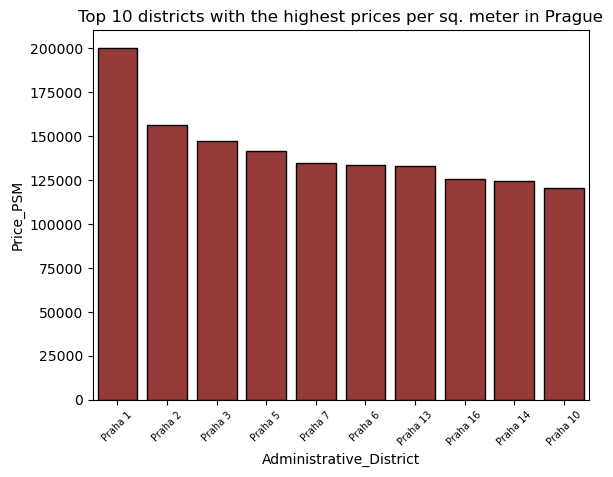

In [185]:
sns.barplot(x=prices_grouped_sorted.Administrative_District [:10],
            y=prices_grouped_sorted.Price_PSM,
            color="brown",
            edgecolor="black")

plt.xticks(fontsize=7, rotation=45)

plt.title("Top 10 districts with the highest prices per sq. meter in Prague")

#### Adding the *Administrative District* column to our original listings dataset

In [188]:
df_3.sample()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,potential_revenue,availability_cat
434,4782133,HOTEL ROOM IN CENTRAL OF PRAGUE,1112333,Igor,Praha 2,50.07060,14.43003,Entire home/apt,6923.00000,3,65,2022-06-14,0.52000,12,365,0,1794095.45000,high


In [190]:
cadastral_area.head()

,ZIP_Code,Cadastral_Area,Administrative_District,Municipal_District
0,10000,Vršovice,Praha 10,Praha 10
1,10200,Hostivař,Praha 15,Praha 10
2,10200,Štěrboholy,Praha 15,Praha 10
3,10300,Lipany,Praha 21,Praha 10
4,10300,Benice,Praha 22,Praha 10


In [192]:
df_4 = df_3.merge(cadastral_area[["Cadastral_Area", "Administrative_District"]], how="left", left_on="neighbourhood", right_on="Cadastral_Area").drop("Cadastral_Area", axis=1)

In [194]:
df_4["Administrative_District"] = df_4["Administrative_District"].fillna(df_4["neighbourhood"])
df_4.sample()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,potential_revenue,availability_cat,Administrative_District
4949,863739765485398783,NEW Rooftop airbnb : Private Terrace! CITY Cen...,10680564,Tereza & Friends,Praha 1,50.07949,14.41704,Entire home/apt,1629.00000,1,78,2025-02-24,3.48000,70,85,56,422155.35000,low,Praha 1


### 3. Saving the Dateframes to CSV

In [197]:
df_4.to_csv("airbnb_listings_cleaned.csv", index=False)

In [199]:
cadastral_prices.to_csv("Prague_selling_prices.csv", index=False)

### 4. Analysis Results

Here are the key findings from the Airbnb analysis in Prague:
* Increase in Listings: As of March 2025, the number of active Airbnb listings rose to 8,763, showing an upward trend in availability.
* Popular Districts: The highest concentration of Airbnb rentals is in Prague 1, followed by Prague 2, 3, and 5.
* Profitability of Renting: The most profitable districts for rental investments are Prague 1, Prague 7, and Prague 5, where Airbnb revenues exceed long-term rental profits.
* Nightly Rates: The average nightly price for Airbnb listings in Prague 1 is 2,626 Kč, making it the most expensive district for short-term stays.
* Real Estate Prices: Prague 1 has the highest apartment prices, reaching nearly 200,000 Kč per square meter, making it the most expensive district for property purchases.
* Return on Investment: Prague 9 has the shortest return rate of 14.6 years, followed by Prague 8 (15 years) and Prague 7 (16.4 years).

#### Tableau visualization

Follow this [link on my profile](https://public.tableau.com/views/AirBnBPrague-listingsinvesting_17441981505150/Story1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link).

![Airbnb Prague - listings](Tableau-Listings.png)

![Airbnb Prague - investing](Tableau-Investing.png)